
mmdetection 과 같은 라이브러리를 사용하면 쉽게 다양한 모델을 활용할 수 있다.

https://github.com/open-mmlab/mmdetection

Instance Segmentation을 해봅시다


In [1]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 6.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 23.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 9.2 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
%pip install -v -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36296, done.
remote: Counting objects: 100% (950/950), done.
remote: Compressing objects: 100% (528/528), done.
remote: Total 36296 (delta 486), reused 731 (delta 409), pack-reused 35346
Receiving objects: 100% (36296/36296), 56.73 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (25424/25424), done.
/content/mmdetection
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-pmo0gnw3/mmdet.egg-info
  writing /tmp/pip-pip-egg-info-pmo0gnw3/mmdet.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-pmo0gnw3/mmdet.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-pmo0gnw3/mmdet.egg-info/requires.txt
  writing top-level names to /tmp/pi

원하는 모델을 선택하고 설정이 들어있는 config 파일을 다운로드 합니다

https://github.com/open-mmlab/mmdetection

In [3]:
from mmdet.apis import init_detector, inference_detector
import mmcv

In [4]:
# 디바이스 설정
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
# 모델 파일 다운로드

!wget 'https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth' 

--2023-06-01 23:20:53--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.82.215, 163.181.82.216, 163.181.82.213, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.82.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177868694 (170M) [application/octet-stream]
Saving to: ‘mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth’

mask_rcnn_r50_fpn_m 100%[===================>] 169.63M  24.7MB/s    in 6.9s    

2023-06-01 23:21:00 (24.7 MB/s) - ‘mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth’ saved [177868694/177868694]



이미지를 불러서 적용해봅시다. 

In [6]:
from mmdet.apis import init_detector, inference_detector
import mmcv

# Config 파일과 모델 파일(체크포인트) 지정합니다. 
config_file = '/content/mmdetection/configs/mask_rcnn/mask-rcnn_r101_fpn_ms-poly-3x_coco.py'
checkpoint_file = '/content/mmdetection/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth'

# 두 개의 파일로부터 모델을 생성합니다. 
model = init_detector(config_file, checkpoint_file, device='cuda')


Loads checkpoint by local backend from path: /content/mmdetection/mask_rcnn_r50_fpn_mstrain-poly_3x_coco_20210524_201154-21b550bb.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: backbone.layer3.6.conv1.weight, backbone.layer3.6.bn1.weight, backbone.layer3.6.bn1.bias, backbone.layer3.6.bn1.running_mean, backbone.layer3.6.bn1.running_var, backbone.layer3.6.conv2.weight, backbone.layer3.6.bn2.weight, backbone.layer3.6.bn2.bias, backbone.layer3.6.bn2.running_mean, backbone.layer3.6.bn2.running_var, backbone.layer3.6.conv3.weight, backbone.layer3.6.bn3.weight, backbone.layer3.6.bn3.bias, backbone.layer3.6.bn3.running_mean, backbone.layer3.6.bn3.running_var, backbone.layer3.7.conv1.weight, backbone.layer3.7.bn1.weight, backbone.layer3.7.bn1.bias, backbone.layer3.7.bn1.running_mean, backbone.layer3.7.bn1.running_var, backbone.layer3.7.conv2.weight, backbone.layer3.7.bn2.weight, backbone.layer3.7.bn2.bias, backbone.layer3.7.bn2.running_mean, backbon

모델과 pth 파일 일부 불일치 하는 결과 보이는데, 추후 확인 필요함

In [10]:
# 테스트 이미지를 불러오고 감지합니다. 
img = "https://ultralytics.com/images/bus.jpg" 
result = inference_detector(model, img)


In [9]:
result

<DetDataSample(

    META INFORMATION
    img_shape: (1067, 800)
    scale_factor: (0.9876543209876543, 0.9879629629629629)
    img_id: 0
    batch_input_shape: (1088, 800)
    img_path: 'https://ultralytics.com/images/bus.jpg'
    pad_shape: (1088, 800)
    ori_shape: (1080, 810)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            masks: PolygonMasks(num_masks=0, height=1080, width=810)
        ) at 0x7f4f8cd70550>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            masks: PolygonMasks(num_masks=0, height=1080, width=810)
        ) at 0x7f4f8ce14d30>
    pred_instances: <InstanceData(
 

이미지를 출력해봅시다

https://github.com/open-mmlab/mmdetection/blob/main/demo/inference_demo.ipynb

In [13]:
from mmdet.registry import VISUALIZERS

visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# Show the results
img = mmcv.imread("https://ultralytics.com/images/bus.jpg")
img = mmcv.imconvert(img, 'bgr', 'rgb')


visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True)

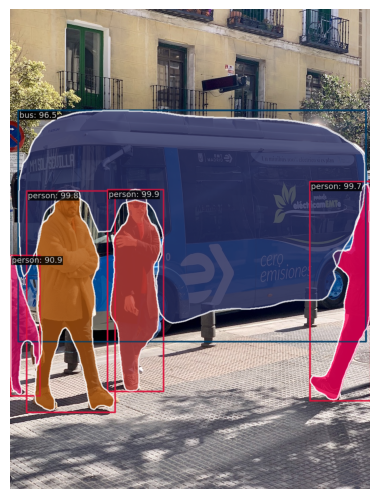

In [17]:
visualizer.show()